In [47]:
import pandas as pd

In [48]:
data=pd.read_csv('data/play_tennis.csv')

In [49]:
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [51]:
day=data['day']
data['day']=LabelEncoder().fit_transform(data['day'])

In [52]:
data['day']

0      0
1      6
2      7
3      8
4      9
5     10
6     11
7     12
8     13
9      1
10     2
11     3
12     4
13     5
Name: day, dtype: int32

In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
non_numeric_features = ['day', 'outlook', 'temp', 'humidity', 'wind','play']

for feature in non_numeric_features:
    label_encoders[feature] = LabelEncoder()
    data[feature] = label_encoders[feature].fit_transform(data[feature])

In [54]:
data

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [42]:
data.drop(['day'],axis=1)
x=data.drop(['play'],axis=1)
y=data['play']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5,random_state=41)

In [45]:
model=DecisionTreeClassifier(criterion='entropy')

In [46]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6, 0.8333333333333334, 'x[1] <= 1.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(0.4, 0.5, 'x[4] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

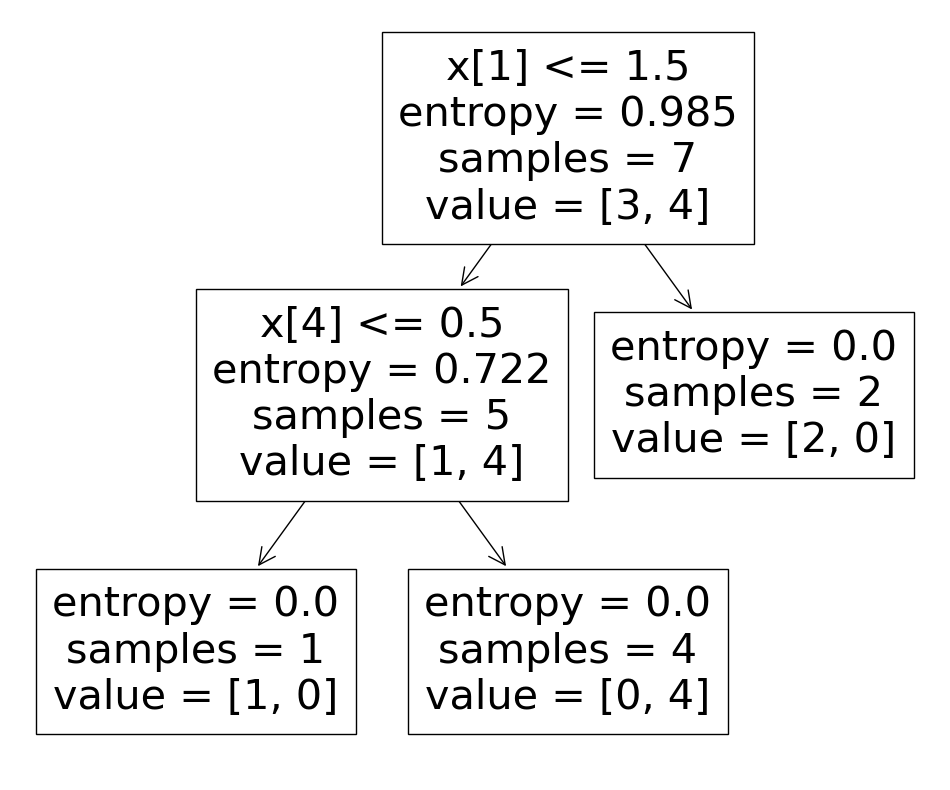

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
tree.plot_tree(model)